In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os


In [102]:

data = []
N=1000
folder = 'dusty_disc_danti_N_1000_202506021602'
samples = [0,5,10,30]
#samples = [0,1,10,100,1000]
files = os.listdir(os.path.join(os.getcwd(),"Data",folder))
with open(os.path.join(os.getcwd(),"Data",folder,files[3]),'r') as f:
    head_idx = 0
    lines = f.readlines()
    for i in range(len(lines)):
        if lines[-i-1].startswith('#'):
            print(i)
            head_idx = len(lines)-i-1
            break
    header = lines[head_idx].split()[1:]
    print(header)
for file in files:
    if '_' in file:
        data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
        data[-1].columns = header
        
        

        


1000
['R', 'Sigma', 'Sigma_G', 'Simga_DS', 'Sigma_DL', 'Sigma_P', 'T', 'epsilon[0]', 'epsilon[1]', 'epsilon[2]', 'a[0]', 'a[1]', 'a[2]', 'Mdot', 'MdotSS']


/tmp/ipykernel_1089164/1496401795.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
/tmp/ipykernel_1089164/1496401795.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
/tmp/ipykernel_1089164/1496401795.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
/tmp/ipykernel_1089164/1496401795.py:19: FutureWarning: The 'delim_whitespace' 

/tmp/ipykernel_1089164/2253687953.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1,1].set_ylim((10e-7,10e4))


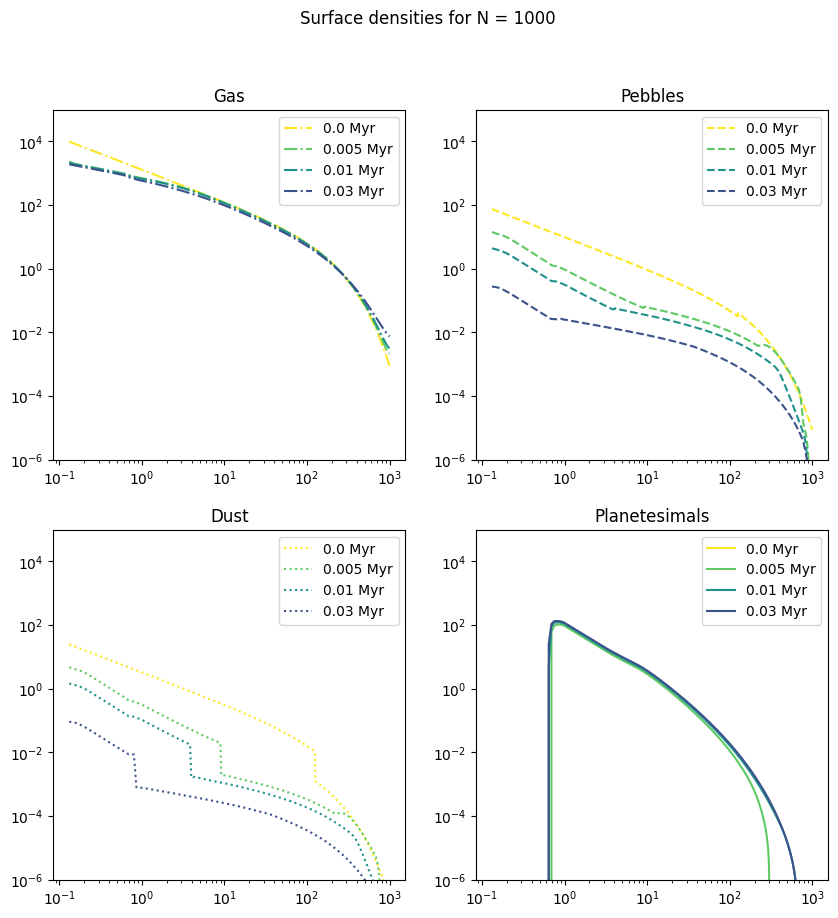

In [103]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
color=iter(plt.cm.viridis(np.linspace(0,1,5)[::-1]))
for i in range(len(data)):
    if i in samples:
        c = next(color)
        axs[0,0].loglog(data[i]["R"],data[i]["Sigma_G"],linestyle='dashdot',c=c)
        axs[1,0].loglog(data[i]["R"],data[i]["Simga_DS"],linestyle='dotted',c=c)
        axs[0,1].loglog(data[i]["R"],data[i]["Sigma_DL"],linestyle='dashed',c=c)
        axs[1,1].loglog(data[i]["R"],data[i]["Sigma_P"],linestyle='solid',c=c)
        #ax.set_title("Planetesimal and Dust Distribution Over Time")
        axs[0,0].set_ylim((10e-7,10e4))
        axs[1,0].set_ylim((10e-7,10e4))
        axs[0,1].set_ylim((10e-7,10e4))
        axs[1,1].set_ylim((10e-7,10e4))

        axs[0,0].set_title("Gas")
        axs[1,0].set_title("Dust")
        axs[0,1].set_title("Pebbles")
        axs[1,1].set_title("Planetesimals")
axs[0,0].legend([f"{yr/1000} Myr" for yr in samples])
axs[1,0].legend([f"{yr/1000} Myr" for yr in samples])
axs[0,1].legend([f"{yr/1000} Myr" for yr in samples])
axs[1,1].legend([f"{yr/1000} Myr" for yr in samples])
fig.suptitle(f"Surface densities for N = {N}")
#plt.savefig(f"Graphs/4_graphs_sigma_N{N}_Danti_06_02")
plt.show()

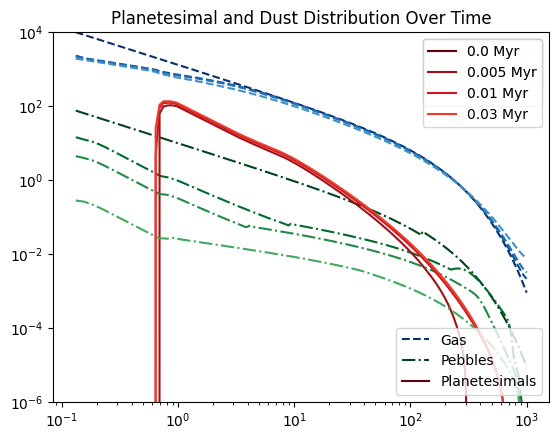

In [104]:
fig, ax = plt.subplots()
color=iter(plt.cm.Blues(np.linspace(0.5,1,5)[::-1]))
color2=iter(plt.cm.Greys(np.linspace(0.5,1,5)[::-1]))
color3=iter(plt.cm.Greens(np.linspace(0.5,1,5)[::-1]))
color4=iter(plt.cm.Reds(np.linspace(0.5,1,5)[::-1]))
for i in range(len(data)):
    if i in samples:
        c1 = next(color)
        c2 = next(color2)
        c3 = next(color3)
        c4 = next(color4)
        ax.loglog(data[i]["R"],data[i]["Sigma_G"],linestyle='dashed',c=c1,label = f'Gas_{i/1000} Myr')
        #ax.loglog(data[i]["R"],data[i]["Simga_DS"],linestyle='dotted',c=c2, label = f'Grains_{i/1000} Myr')
        ax.loglog(data[i]["R"],data[i]["Sigma_DL"],linestyle='dashdot',c=c3, label = f'Pebbles_{i/1000} Myr')
        #ax.loglog(data[i]["R"],data[i]["Simga_DS"]+data[i]["Sigma_DL"],linestyle='dotted',c=c2, label = f'Dust_{i/1000} Myr')
        ax.loglog(data[i]["R"],data[i]["Sigma_P"],linestyle='solid',c=c4, label = f'Planetesimals_{i/1000} Myr')
        ax.set_title("Planetesimal and Dust Distribution Over Time")
        ax.set_ylim((10e-7,10e3))
        handles, labels = ax.get_legend_handles_labels()
        time_handles, time_labels, pop_handles, pop_labels = [], [], [], []
        for i in range(len(labels)):
            pop, t= (labels[i].split("_"))
            if pop == 'Planetesimals':
                time_handles.append(handles[i])
                time_labels.append(t)
            if t == '0.0 Myr':
                pop_handles.append(handles[i])
                pop_labels.append(pop)
        tleg = ax.legend(time_handles,time_labels,loc='upper right')
        pleg = plt.legend(pop_handles,pop_labels,loc='lower right')
        ax.add_artist(tleg)
#plt.savefig(f"Graphs/1_Graph_N_{N}_Danti_06_02")    
plt.show()

/tmp/ipykernel_1089164/1492947855.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[0,1].set_ylim((10e-6,10e3))


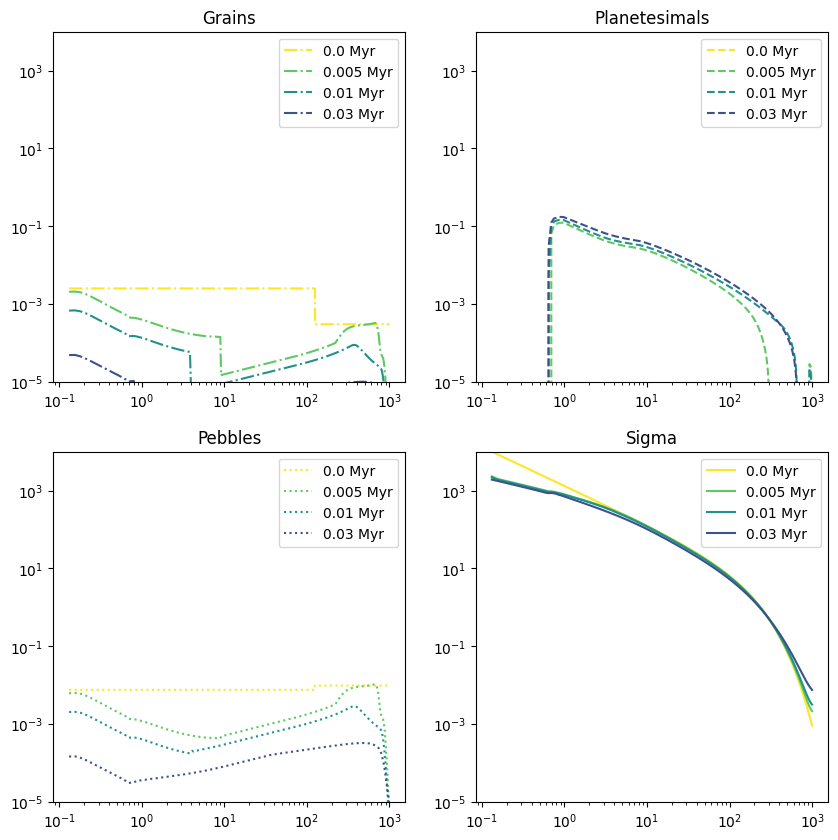

In [105]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
color=iter(plt.cm.viridis(np.linspace(0,1,5)[::-1]))
for i in range(len(data)):
    if i in samples:
        c = next(color)
        axs[0,0].loglog(data[i]["R"],data[i]["epsilon[0]"],linestyle='dashdot',c=c)
        axs[1,0].loglog(data[i]["R"],data[i]["epsilon[1]"],linestyle='dotted',c=c)
        axs[0,1].loglog(data[i]["R"],data[i]["epsilon[2]"],linestyle='dashed',c=c)
        axs[1,1].loglog(data[i]["R"],data[i]["Sigma"],linestyle='solid',c=c)
        #ax.set_title("Planetesimal and Dust Distribution Over Time")
        axs[0,0].set_ylim((10e-6,10e3))
        axs[1,0].set_ylim((10e-6,10e3))
        axs[0,1].set_ylim((10e-6,10e3))
        axs[1,1].set_ylim((10e-6,10e3))

        axs[0,0].set_title("Grains")
        axs[1,0].set_title("Pebbles")
        axs[0,1].set_title("Planetesimals")
        axs[1,1].set_title("Sigma")
axs[0,0].legend([f"{yr/1000} Myr" for yr in samples])
axs[1,0].legend([f"{yr/1000} Myr" for yr in samples])
axs[0,1].legend([f"{yr/1000} Myr" for yr in samples])
axs[1,1].legend([f"{yr/1000} Myr" for yr in samples])
#fig.suptitle(f"Surface densities for N = {N}")
#plt.savefig(f"Graphs/4_graphs_frac_N{N}_Danti_06_02")

plt.show()